In [1]:
import requests

def buscar_liga(query):
    url = f"https://api.cartola.globo.com/ligas?q={query}"
    print(url)
    
    try:
        # Ignorando a verificação SSL com verify=False
        response = requests.get(url, verify=False)
        response.raise_for_status()  # Verifica se há algum erro HTTP
        ligas = response.json()  # Transforma a resposta JSON em um dicionário Python
        return ligas
    except requests.exceptions.HTTPError as err:
        print(f"Erro HTTP: {err}")
    except requests.exceptions.RequestException as e:
        print(f"Erro na requisição: {e}")



In [2]:

import requests
import pandas as pd

def buscar_time_por_nome(nome_time):
    url = "https://api.cartola.globo.com/times"
    
    try:
        # Fazendo a requisição sem verificar o certificado
        response = requests.get(url, params={'q': nome_time}, verify=False)
        response.raise_for_status()
        
        return response.json()  # Retorna os dados em formato JSON
            
    except requests.exceptions.HTTPError as http_err:
        print(f"Erro na requisição: {http_err}")
        return []
    except Exception as e:
        print(f"Ocorreu um erro: {e}")
        return []

def buscar_time_por_nomes(nomes, nomes_cartola):
    resultados = []

    for nome in nomes:
        dados = buscar_time_por_nome(nome)
        
        # Log para verificar o que foi retornado
        if not dados:
            print(f"Nenhum dado retornado para o time: {nome}")
        else:
            found = False
            for item in dados:
                # Verifica se o nome ou o nome_cartola corresponde
                if item['nome'] == nome or item['nome_cartola'] == nomes_cartola.get(nome):
                    resultados.append({'nome': item['nome'], 'time_id': item['time_id']})
                    found = True
            
            if not found:
                print(f"Time não encontrado: {nome}")

    df = pd.DataFrame(resultados)
    return df

# Lista de nomes exatos dos times
nomes_para_buscar = [
    "SC_Eagles1", "Versa 10 FC", "COJEDES FC", "Mangueiralonga Pix", 
    "L de Lula FC", "M1tolândia FC", "Real Momesso", "__init__SC", 
    "Jauzera", "RuimMadri100", "Pinga Bola FC", "S.e 11 estrelas", 
    "Cactus F.C", "SeppYu FC", "Flecha_Rodrigues FC", "E.C. Barka Furada", 
    "SR Pipi", "Miotto84 F.C.", "BritegaFC", "APATTARO FC", 
    "Thiagodsb1", "LDH23", "MARTELO FMS", "Oda_SCCP Bimundial", 
    "LaPecoraNera", "DJ MALVADO TRICOLOR", "DeCanela Futebol Clube", 
    "Rei de Copas GFBPA"
]

# Dicionário com nomes_cartola
nomes_cartola = {
    "SC_Eagles1": "Eduardo Francato",
    "Versa 10 FC": "Jose Ricardo Vercesi",
    "COJEDES FC": "Anahiz",
    "Mangueiralonga Pix": "Pitbull",
    "L de Lula FC": "Guido",
    "M1tolândia FC": "Jece Pontes",
    "Real Momesso": "Saulo Momesso",
    "__init__SC": "Quevin Vieira Souza",
    "Jauzera": "Sir Pelegrina",
    "RuimMadri100": "Adiel Bittencourt",
    "Pinga Bola FC": "Joao Cavoto",
    "S.e 11 estrelas": "Mito RR",
    "Cactus F.C": "Bianchin",
    "SeppYu FC": "Yuri Sepp",
    "Flecha_Rodrigues FC": "Reginaldo",
    "E.C. Barka Furada": "Caio Klabenhoff",
    "SR Pipi": "Silvio",
    "Miotto84 F.C.": "Ana Raquel",
    "BritegaFC": "Gabriel Brites",
    "APATTARO FC": "Alessandro Pattaro",
    "Thiagodsb1": "Thiago Bento",
    "LDH23": "Lukas",
    "MARTELO FMS": "Fernando MS",
    "Oda_SCCP Bimundial": "Odair",
    "LaPecoraNera": "Thiago Chiamenti",
    "DJ MALVADO TRICOLOR": "Djalma Pinto",
    "DeCanela Futebol Clube": "Vagner Lopes",
    "Rei de Copas GFBPA": "Sott"
}

# Executa a busca e armazena o resultado em um DataFrame
resultado_df = buscar_time_por_nomes(nomes_para_buscar, nomes_cartola)


c:\Users\souzaqu001\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.cartola.globo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\souzaqu001\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.cartola.globo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\souzaqu001\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.cartola.globo.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

In [3]:
import pandas as pd
import requests
import warnings
import time

# Desabilitar os avisos de HTTPS não verificados
warnings.filterwarnings("ignore", message="Unverified HTTPS request")

def buscar_pontos_por_time_e_rodadas(time_id, rodadas):
    pontos_campeonato = []

    for rodada in rodadas:
        url = f"https://api.cartola.globo.com/time/id/{time_id}/{rodada}"
        success = False
        retries = 3  # Número de tentativas

        while not success and retries > 0:
            try:
                response = requests.get(url, verify=False)
                response.raise_for_status()  # Isso levantará um erro para códigos de status de erro
                dados = response.json()

                # Verifica se a mensagem de manutenção está presente
                if 'mensagem' in dados:
                    print(f"Mercado em manutenção para time_id {time_id}, rodada {rodada}: {dados['mensagem']}")
                    pontos_campeonato.append({'Time': time_id, 'Rodada': rodada, 'Pontuação': None})
                    break

                pontuacao = dados.get('pontos_campeonato', 0)
                pontos_atual = dados.get('pontos',0)
                url_escudo = dados.get('time', {}).get('url_escudo_png', '')
                nome_time = dados.get('time', {}).get('nome', '') 

                pontos_campeonato.append({'Time': time_id, 'Rodada': rodada, 'Pontuação': pontuacao, 'Pontuação Rodada':pontos_atual, 'Escudo': url_escudo, 'Nome Time':nome_time})
                success = True  # Requisição bem-sucedida

            except requests.exceptions.HTTPError as http_err:
                if response.status_code == 503:
                    print(f"Serviço indisponível para time_id {time_id}, rodada {rodada}: {http_err}")
                    pontos_campeonato.append({'Time': time_id, 'Rodada': rodada, 'Pontuação': None})
                    break
                else:
                    print(f"Erro na requisição para time_id {time_id}, rodada {rodada}: {http_err}")
                    break
            except Exception as e:
                print(f"Ocorreu um erro: {e}")
                break

            retries -= 1  # Reduz o número de tentativas
            time.sleep(2)  # Aguarda 2 segundos antes da próxima tentativa

    return pontos_campeonato

# Lista de rodadas
rodadas = range(1, 39)  # Rodadas de 1 a 33

# Armazena pontos para todos os times
pontos_resultados = []

for _, row in resultado_df.iterrows():
    time_id = row['time_id']
    pontos = buscar_pontos_por_time_e_rodadas(time_id, rodadas)
    pontos_resultados.extend(pontos)  # Adiciona os resultados da função à lista

# Cria um DataFrame com os resultados
df_resultados = pd.DataFrame(pontos_resultados)


In [4]:
df_resultados.to_excel('cartoleiros_2024.xlsx')

In [112]:
# Ordena o DataFrame pelas colunas de 'Rodada' e 'Pontuação Rodada' de forma decrescente
# Ordena o DataFrame pelas colunas de 'Rodada' e 'Pontuação Rodada' de forma decrescente
df = df_resultados.sort_values(by=['Rodada', 'Pontuação Rodada'], ascending=[True, False])

# Calcula a pontuação máxima e mínima por rodada
df['Pontuação Máxima'] = df.groupby('Rodada')['Pontuação Rodada'].transform('max')
df['Pontuação Mínima'] = df.groupby('Rodada')['Pontuação Rodada'].transform('min')

# Calcula o percentual de aproveitamento
df['Percentual Pontuação'] = ((df['Pontuação Rodada'] - df['Pontuação Mínima']) /
                                    (df['Pontuação Máxima'] - df['Pontuação Mínima'])) * 100

# Exclui os casos onde a pontuação máxima é igual à pontuação mínima (evitar divisão por zero)
df['Percentual Pontuação'] = df['Percentual Pontuação'].fillna(0)


In [115]:

# Divide o DataFrame entre primeiro e segundo turno
df_1_turno = df[df['Rodada'] <= 19]
df_2_turno = df[df['Rodada'] > 19]


In [118]:

# Filtra os dados da 1ª até a 19ª rodada e calcula a média de pontuação por time
df_rodadas_1_19 = (
    df_1_turno
    .groupby('Nome Time')['Percentual Pontuação']
    .mean()
    .reset_index()
    .sort_values(by='Percentual Pontuação', ascending=False)
)

# Filtra os dados das rodadas após a 19ª e calcula a média de pontuação por time
df_rodadas_20_plus = (
    df_2_turno
    .groupby('Nome Time')['Percentual Pontuação']
    .mean()
    .reset_index()
    .sort_values(by='Percentual Pontuação', ascending=False)
)


In [119]:


# Renomear as colunas para evitar confusão ao mesclar os DataFrames
df_rodadas_1_19 = df_rodadas_1_19.rename(columns={'Percentual Pontuação': 'Aproveitamento Primeiro Turno'})
df_rodadas_20_plus = df_rodadas_20_plus.rename(columns={'Percentual Pontuação': 'Aproveitamento Segundo Turno'})

# Mesclar os DataFrames para ter as pontuações dos dois turnos no mesmo DataFrame
df_comparacao = pd.merge(df_rodadas_1_19, df_rodadas_20_plus, on='Nome Time', how='inner')


# Calcular a melhoria percentual de cada time
df_comparacao['Melhoramento Percentual'] = (
    (df_comparacao['Aproveitamento Segundo Turno'] - df_comparacao['Aproveitamento Primeiro Turno']) 
    / df_comparacao['Aproveitamento Primeiro Turno']
) * 100


# Ordenar pela coluna de melhoramento percentual em ordem decrescente
df_comparacao = df_comparacao.sort_values(by='Melhoramento Percentual', ascending=False)

# Exibir o DataFrame com a comparação
df_comparacao[['Nome Time', 'Aproveitamento Primeiro Turno', 'Aproveitamento Segundo Turno', 'Melhoramento Percentual']]





,Nome Time,Aproveitamento Primeiro Turno,Aproveitamento Segundo Turno,Melhoramento Percentual
23,Versa 10 FC,44.247032,65.021860,46.951912
25,DJ MALVADO TRICOLOR,39.562016,51.900570,31.187880
20,Mangueiralonga Pix,45.342909,58.054226,28.033749
16,Jauzera,51.111937,65.332223,27.821848
18,Pinga Bola FC,48.931788,62.219716,27.156022
9,Cactus F.C,56.944761,70.589377,23.961142
11,E.C. Barka Furada,55.489730,67.523272,21.686071
10,__init__SC,56.533696,68.683624,21.491480
22,Miotto84 F.C.,44.961316,53.558541,19.121381
15,Oda_SCCP Bimundial,52.643268,61.973113,17.722770


In [121]:
import os
import base64
from io import BytesIO
from PIL import Image

# Função para converter imagem em base64 com validação de erro
def image_to_base64(img_path):
    try:
        img = Image.open(img_path)
        buffered = BytesIO()
        img.save(buffered, format="PNG")
        img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
        return img_str
    except Exception as e:
        print(f"Erro ao tentar abrir ou converter a imagem: {e}")
        return None

# Função para gerar o HTML com o conteúdo dinâmico
def gerar_html(df):
    html = """
    <!DOCTYPE html>
    <html lang="pt-br">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Tabela de Times e Aproveitamento</title>
        <style>
            body { 
                font-family: Arial, sans-serif; 
                background-color: #f8f9fa; 
                color: #333;
                margin: 0;
                padding: 0;
            }
            h1 {
                font-size: 32px; 
                font-weight: bold;
                text-align: center;
                color: #F1C40F;  /* Amarelo Pirelli */
                margin: 20px;
            }
            h1 img {
                height: 40px;
                vertical-align: middle;
                margin-right: 15px;
            }
            table { 
                width: 95%; 
                margin: 0 auto; 
                border-collapse: collapse; 
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            }
            th, td { 
                padding: 12px 15px; 
                text-align: center; 
                border: 1px solid #ddd; 
                font-size: 20px;  /* Aumento da fonte */
                font-weight: bold; /* Fonte mais pesada */
            }
            th { 
                background-color: #F1C40F;  /* Amarelo Pirelli */
                color: black; 
            }
            tr:nth-child(even) { 
                background-color: #f2f2f2; 
            }
            td img { 
                width: 40px; 
                height: 40px; 
                border-radius: 5px; 
            }
            .row { 
                display: flex; 
                justify-content: space-between; 
                flex-wrap: wrap;
                gap: 20px;
            }
            .column { 
                flex: 0 0 48%; 
            }
            .positive { 
                color: green; 
                font-weight: bold;
            }
            .negative { 
                color: red; 
                font-weight: bold;
            }
        </style>
    </head>
    <body>
        <h1><img src="Logo_Pirelli.svg" alt="Logo Pirelli">Tabela de Aproveitamento dos Times</h1>
        <div class="row">
    """
    
    # Divida os dados do dataframe em duas metades
    df1 = df_comparacao.iloc[:len(df_comparacao)//2]  # Primeira metade
    df2 = df_comparacao.iloc[len(df_comparacao)//2:]  # Segunda metade

    def gerar_tabela(df_part):
        tabela_html = "<table><thead><tr><th>Escudo</th><th>Nome do Time</th><th>Aproveitamento Primeiro Turno</th><th>Aproveitamento Segundo Turno</th><th>Diferença de Aproveitamento</th></tr></thead><tbody>"
        
        for _, row in df_part.iterrows():
            escudo_path = f"{row['Nome Time']}.png"
            escudo_base64 = image_to_base64(escudo_path)
            
            if escudo_base64:
                escudo_data_url = f"data:image/png;base64,{escudo_base64}"
            else:
                print(f"Imagem não encontrada para o time {row['Nome Time']}, utilizando imagem padrão.")
                escudo_data_url = "data:image/png;base64,DEFAULT_IMAGE_BASE64_HERE"
            
            time = row['Nome Time']
            primeiro_turno = f"{row['Aproveitamento Primeiro Turno']:.2f}%"
            segundo_turno = f"{row['Aproveitamento Segundo Turno']:.2f}%"
            melhoramento = f"{row['Melhoramento Percentual']:.2f}%"
            
            if row['Melhoramento Percentual'] < 0:
                melhoramento_class = "negative"
            else:
                melhoramento_class = "positive"
            
            tabela_html += f"""
                <tr>
                    <td><img src="{escudo_data_url}" alt="{time}"></td>
                    <td>{time}</td>
                    <td>{primeiro_turno}</td>
                    <td>{segundo_turno}</td>
                    <td class="{melhoramento_class}">{melhoramento}</td>
                </tr>
            """
        
        tabela_html += "</tbody></table>"
        return tabela_html
    
    # Adiciona as duas tabelas (em duas colunas)
    html += f'<div class="column">{gerar_tabela(df1)}</div>'
    html += f'<div class="column">{gerar_tabela(df2)}</div>'
    
    html += """
        </div>
    </body>
    </html>
    """
    
    return html

# Gerar o HTML
html_content = gerar_html(df)

# Salvar em um arquivo HTML
with open("tabela_times_com_imagens_duas_colunas_pirelli_com_logo.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("Arquivo HTML com a tabela dividida em duas colunas, logo e cores da Pirelli gerado com sucesso!")


Erro ao tentar abrir ou converter a imagem: [Errno 2] No such file or directory: 'C:\\Users\\souzaqu001\\Desktop\\Backup\\downloads\\ Rei de Copas GFBPA.png'
Imagem não encontrada para o time  Rei de Copas GFBPA, utilizando imagem padrão.
Arquivo HTML com a tabela dividida em duas colunas, logo e cores da Pirelli gerado com sucesso!


,Nome Time,Aproveitamento Primeiro Turno,Aproveitamento Segundo Turno,Melhoramento Percentual
23,Versa 10 FC,39.571150,59.259259,49.753695
22,Mangueiralonga Pix,39.571150,51.851852,31.034483
9,Cactus F.C,55.165692,71.428571,29.480061
18,Jauzera,46.978558,58.730159,25.014819
17,Pinga Bola FC,47.758285,58.201058,21.865889
11,__init__SC,54.385965,65.608466,20.634921
6,S.e 11 estrelas,58.479532,66.137566,13.095238
3,Real Momesso,61.598441,69.312169,12.522604
21,Miotto84 F.C.,41.130604,46.031746,11.916046
12,E.C. Barka Furada,54.191033,60.582011,11.793422


KeyboardInterrupt: 

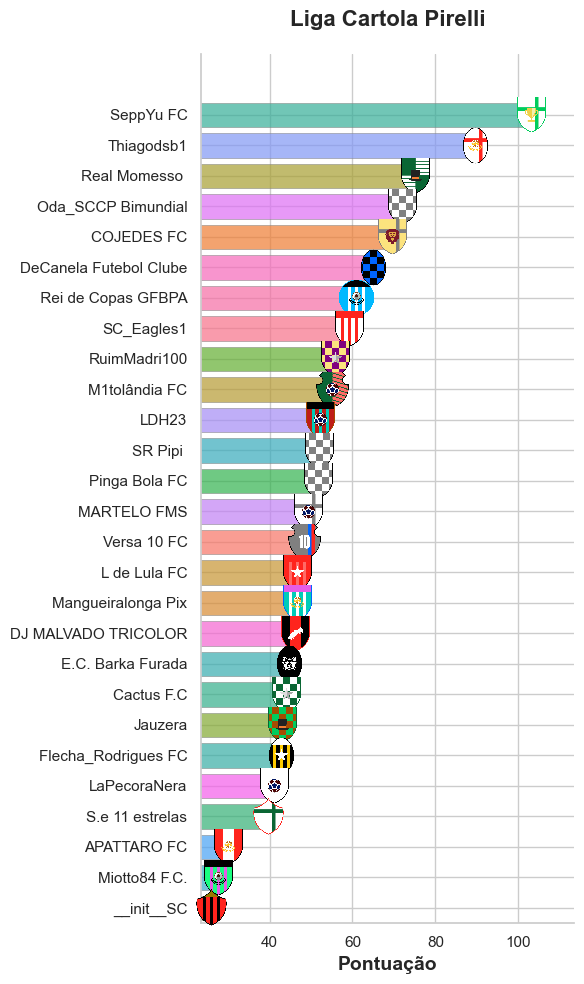

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import urllib.request
from PIL import Image
import os

# Supondo que df_resultados já esteja definido com a coluna "Escudo"
df = df_resultados

# Função para baixar escudos
def baixar_escudos(df):
    if not os.path.exists('escudos'):
        os.makedirs('escudos')

    for index, row in df.iterrows():
        nome_time = row['Nome Time']
        escudo_url = row['Escudo']
        caminho_escudo = f'escudos/{nome_time}.png'
        
        if not os.path.exists(caminho_escudo):  # Verifica se já foi baixado
            try:
                urllib.request.urlretrieve(escudo_url, caminho_escudo)
                print(f'Escudo de {nome_time} baixado com sucesso.')
            except Exception as e:
                print(f'Erro ao baixar escudo de {nome_time}: {e}')

# Baixar os escudos
baixar_escudos(df)

# Obter dados únicos de times e rodadas
times = df['Nome Time'].unique()
num_times = len(times)
rodadas = sorted(df['Rodada'].unique())

# Usar um estilo moderno do seaborn
sns.set_theme(style="whitegrid")

# Cores específicas para os times
cores_times = sns.color_palette("husl", num_times)  # Cores distintas
cores_dict = dict(zip(times, cores_times))

from scipy.interpolate import interp1d

def interpolar_pontuacoes(df, rodadas, frames_por_transicao=30):
    times = df['Nome Time'].unique()
    all_frames = []

    for i in range(len(rodadas) - 1):
        rodada_atual = rodadas[i]
        proxima_rodada = rodadas[i + 1]

        df_atual = df[df['Rodada'] == rodada_atual].set_index('Nome Time')
        df_proxima = df[df['Rodada'] == proxima_rodada].set_index('Nome Time')

        pontuacoes_atual = []
        pontuacoes_proxima = []
        
        for time in times:
            pontuacao_atual = df_atual.loc[time, 'Pontuação'] if time in df_atual.index else 0
            pontuacao_proxima = df_proxima.loc[time, 'Pontuação'] if time in df_proxima.index else pontuacao_atual
            pontuacoes_atual.append(pontuacao_atual)
            pontuacoes_proxima.append(pontuacao_proxima)

        x = np.array([0, 1])
        y = np.array([pontuacoes_atual, pontuacoes_proxima])

        f = interp1d(x, y, axis=0, kind='linear')

        for j in range(frames_por_transicao + 1):
            interpolacao = j / frames_por_transicao
            frame = f(interpolacao)
            all_frames.append(dict(zip(times, frame)))

    return all_frames

frames_interpolados = interpolar_pontuacoes(df, rodadas, frames_por_transicao=30)

fig, ax = plt.subplots(figsize=(6, 10))
ax.set_xlabel("Pontuação", fontsize=14, fontweight='bold')
ax.set_title("Evolução das Pontuações", fontsize=16, fontweight='bold', pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

def adicionar_escudo(x, y, caminho_escudo, ax):
    try:
        escudo = Image.open(caminho_escudo)
        escudo_np = np.array(escudo)
        imagebox = OffsetImage(escudo_np, zoom=0.05)  # Ajustar zoom do escudo
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)
    except Exception as e:
        print(f"Erro ao carregar o escudo de {caminho_escudo}: {e}")

def animate(i):
    ax.clear()
    ax.set_xlabel("Pontuação", fontsize=14, fontweight='bold')
    ax.set_title(f"Liga Cartola Pirelli", fontsize=16, fontweight='bold', pad=20)

    frame_atual = frames_interpolados[i]
    nomes_times = list(frame_atual.keys())
    pontuacoes = list(frame_atual.values())

    # Remover NaN ou Inf de ambos os arrays
    pontuacoes = np.array(pontuacoes)
    nomes_times = np.array(nomes_times)

    # Filtrar os dados válidos
    valid_mask = np.isfinite(pontuacoes)
    pontuacoes = pontuacoes[valid_mask]
    nomes_times = nomes_times[valid_mask]

    sorted_indices = np.argsort(pontuacoes)[::-1]
    pontuacoes = pontuacoes[sorted_indices]
    nomes_times = nomes_times[sorted_indices]

    # Criação das barras com cores específicas
    cores = [cores_dict[time] for time in nomes_times]

    # Inverter a ordem das barras
    bars = ax.barh(nomes_times[::-1], pontuacoes[::-1], color=cores[::-1], edgecolor='black', height=0.8, linewidth=1.5)

    # Limitar os limites do eixo x
    ax.set_xlim(left=min(pontuacoes) * 0.9, right=max(pontuacoes) * 1.1)

    ax.set_ylim(top=len(nomes_times) + 1, bottom=-0.5)  # Aumentar o limite superior
    plt.tight_layout()  # Otimizar o layout

    # Aumentar o espaço entre as barras
    ax.margins(y=0.5)

    for j, time in enumerate(nomes_times):
        caminho_escudo = f'escudos/{time}.png'
        # Ajustar a posição do escudo
        adicionar_escudo(pontuacoes[j], len(nomes_times) - j - 1, caminho_escudo, ax)

    # Adiciona um efeito de sombra
    for bar in bars:
        bar.set_alpha(0.7)  # Transparência
        bar.set_linewidth(0.5)
        bar.set_edgecolor('gray')  # Borda cinza para as barras



ani = FuncAnimation(fig, animate, frames=len(frames_interpolados), interval=200)

# Salvar a animação como GIF
gif_path = "new_animation.gif"
ani.save(gif_path, writer='pillow', fps=30)

plt.show()
